## Iris Species

About Dataset

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv('Iris.csv')

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [6]:
df = data.copy()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.drop(columns='Id', axis=1)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot: ylabel='Species'>

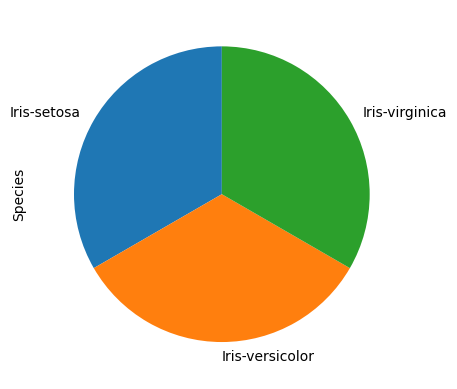

In [12]:
df.Species.value_counts().plot.pie(startangle=90)

In [13]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
espece = df['Species'].unique()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
l = len(features)

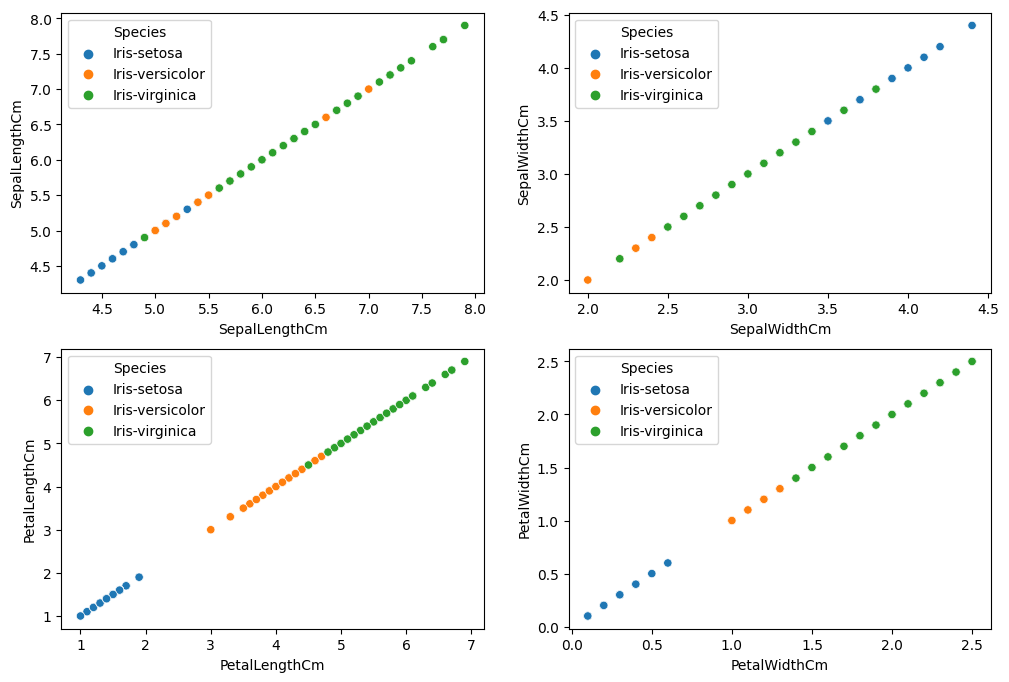

In [15]:
plt.figure(figsize=(12, 8))

for i in range(l):
    plt.subplot(l//2, l//2, i+1)
    sns.scatterplot(data=df, x=features[i], y=features[i], hue='Species')

plt.show()

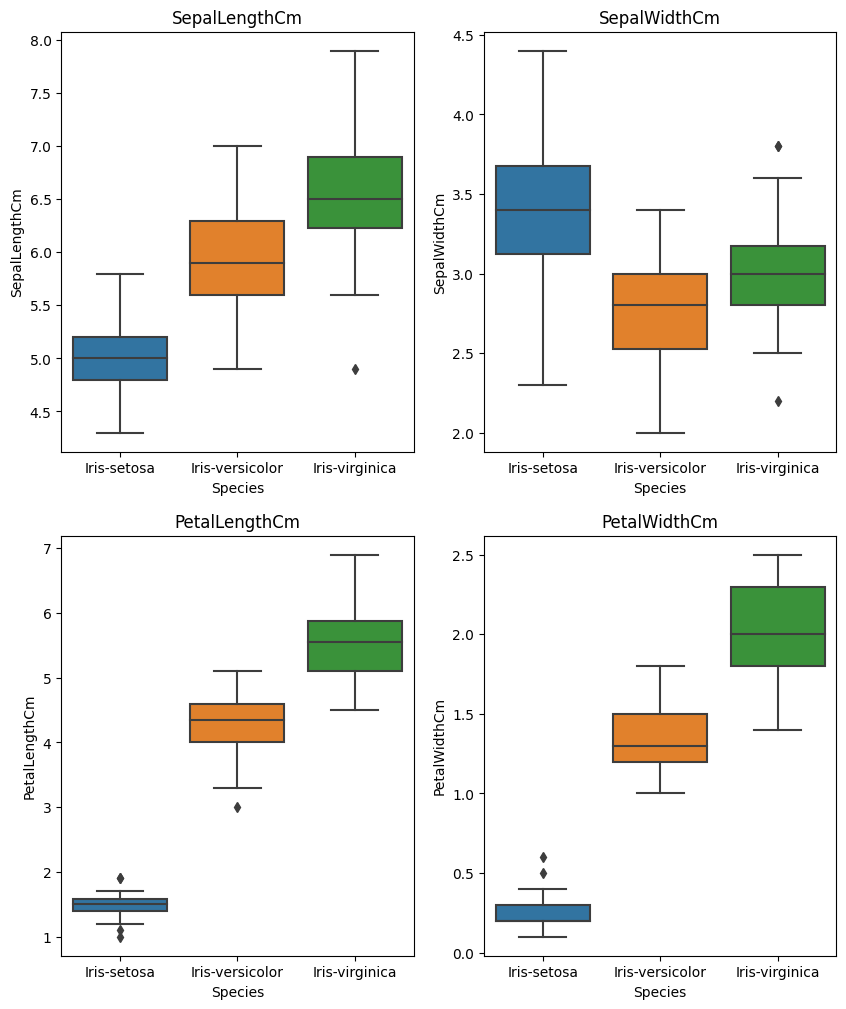

In [16]:
fig = plt.figure(figsize=(10, 12))

for i in range(l):
    f1 = fig.add_subplot(l//2, l//2, i+1)
    sns.boxplot(df, x='Species', y=features[i])
    f1.set_title(features[i])

plt.show()

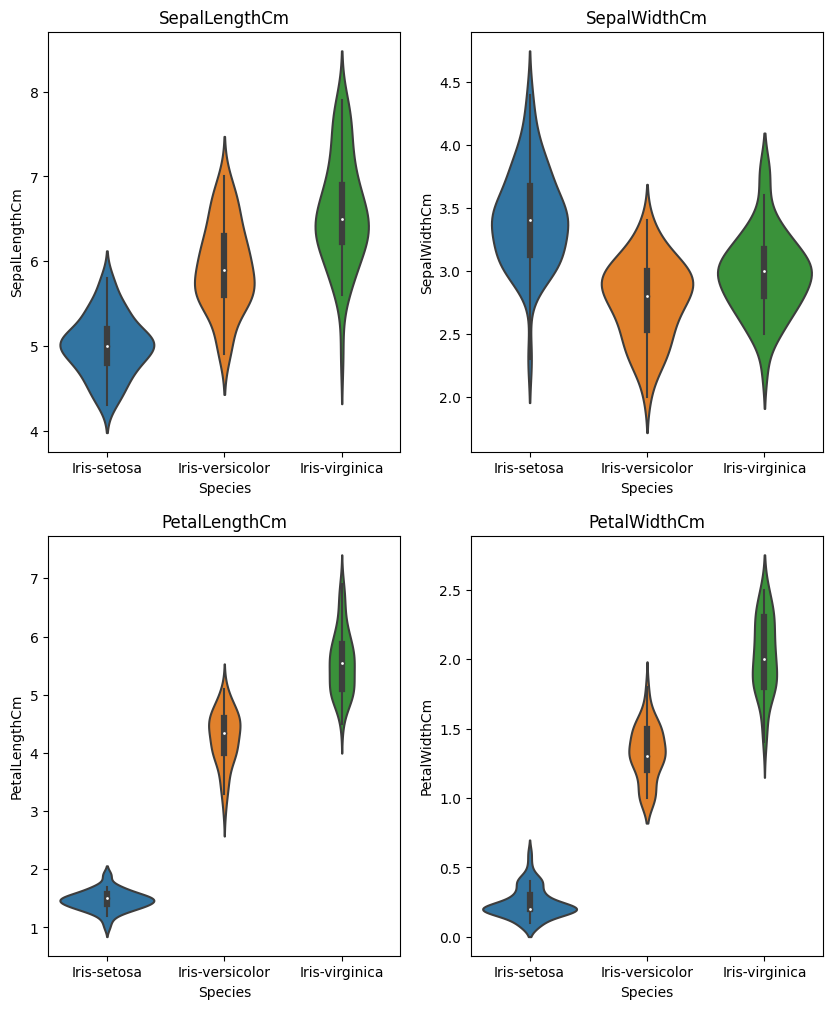

In [17]:
fig = plt.figure(figsize=(10, 12))

for i in range(l):
    f1 = fig.add_subplot(l//2, l//2, i+1)
    sns.violinplot(df, x='Species', y=features[i])
    f1.set_title(features[i])

plt.show()

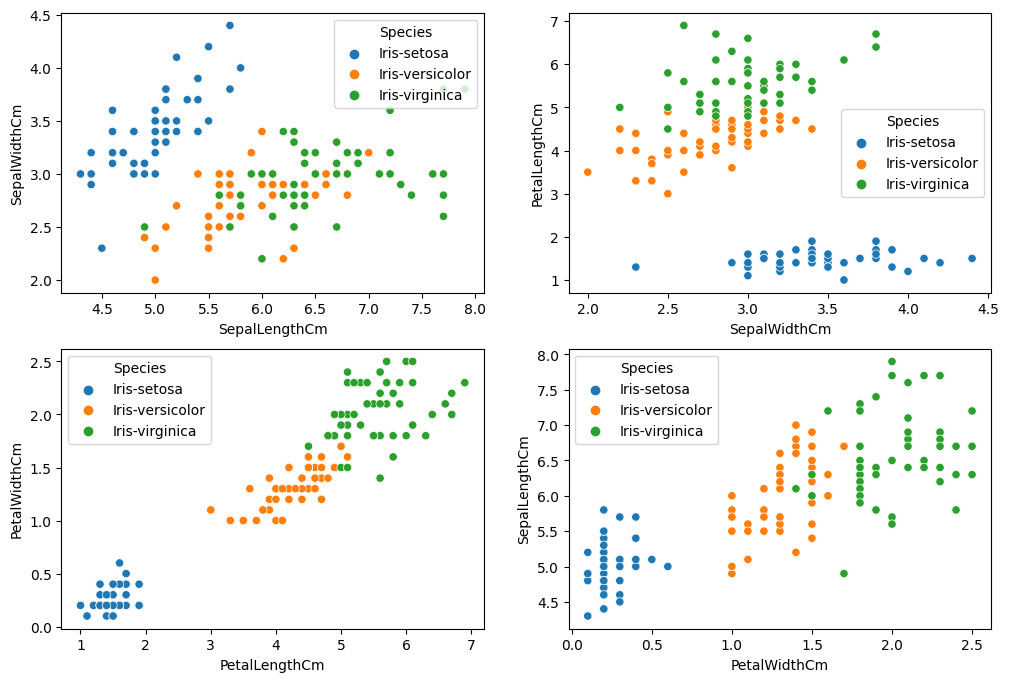

In [18]:
plt.figure(figsize=(12, 8))

for i in range(l):
    plt.subplot(l//2, l//2, i+1)
    if i == l-1:
        j = 0
    else:
        j = i+1
    sns.scatterplot(data=df, x=features[i], y=features[j], hue='Species')
plt.show()

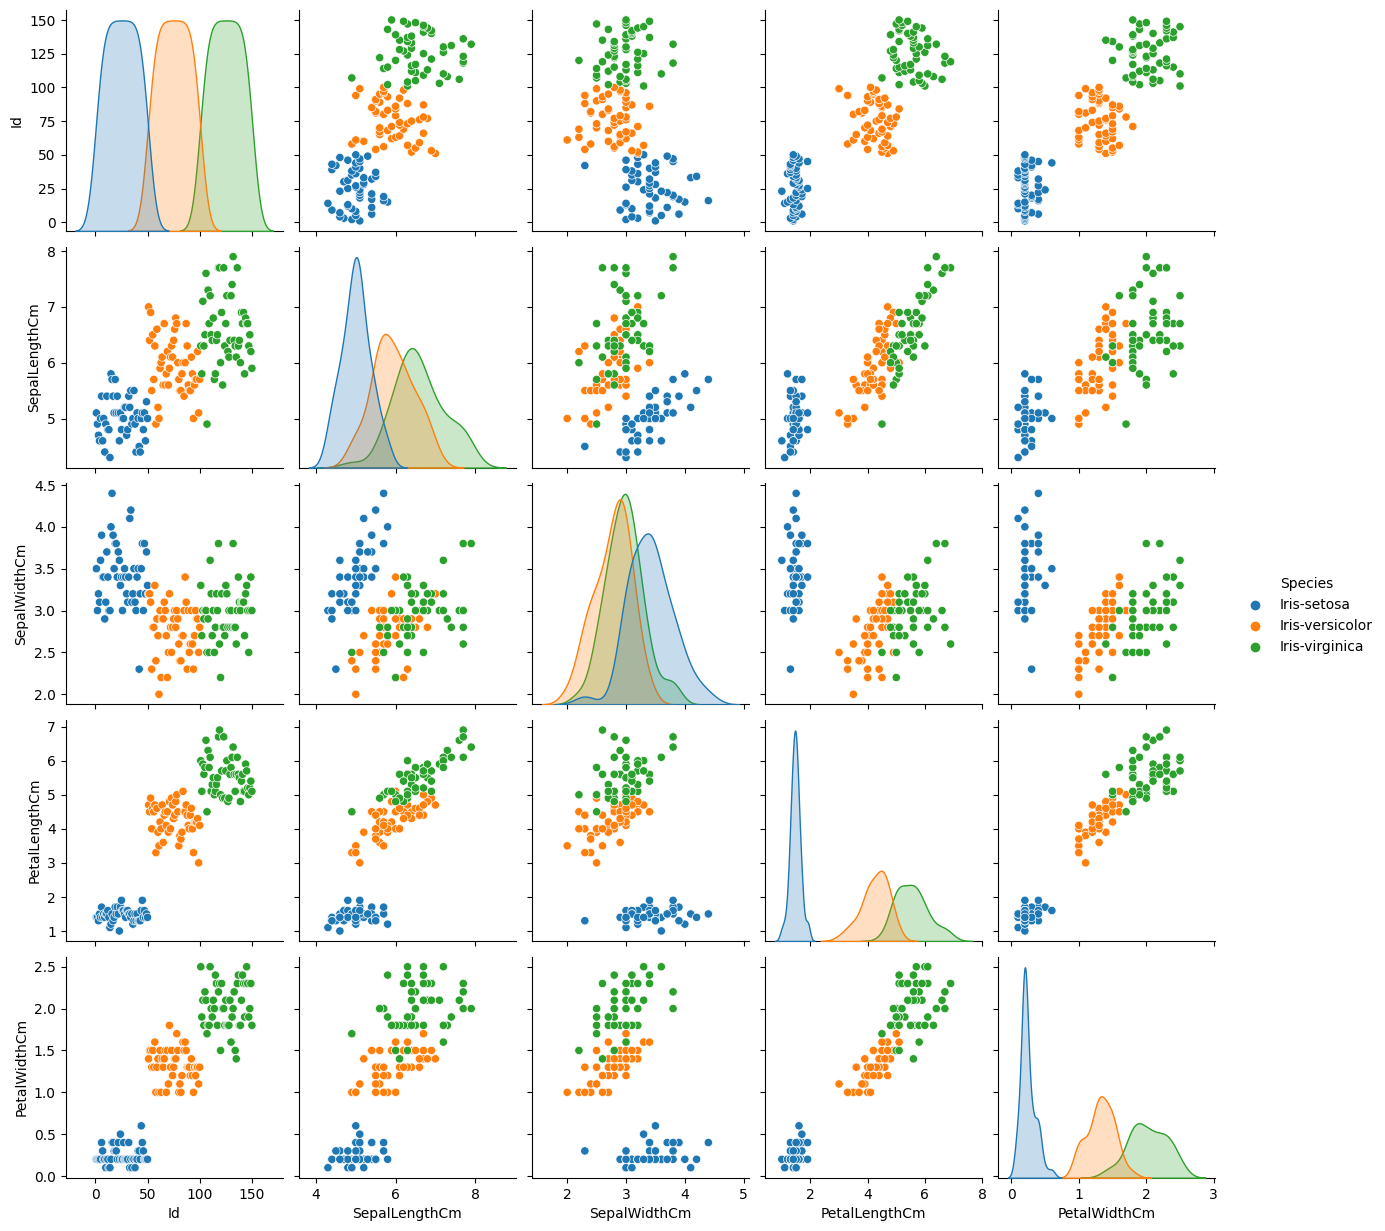

In [19]:
sns.pairplot(df, hue='Species')
plt.show()

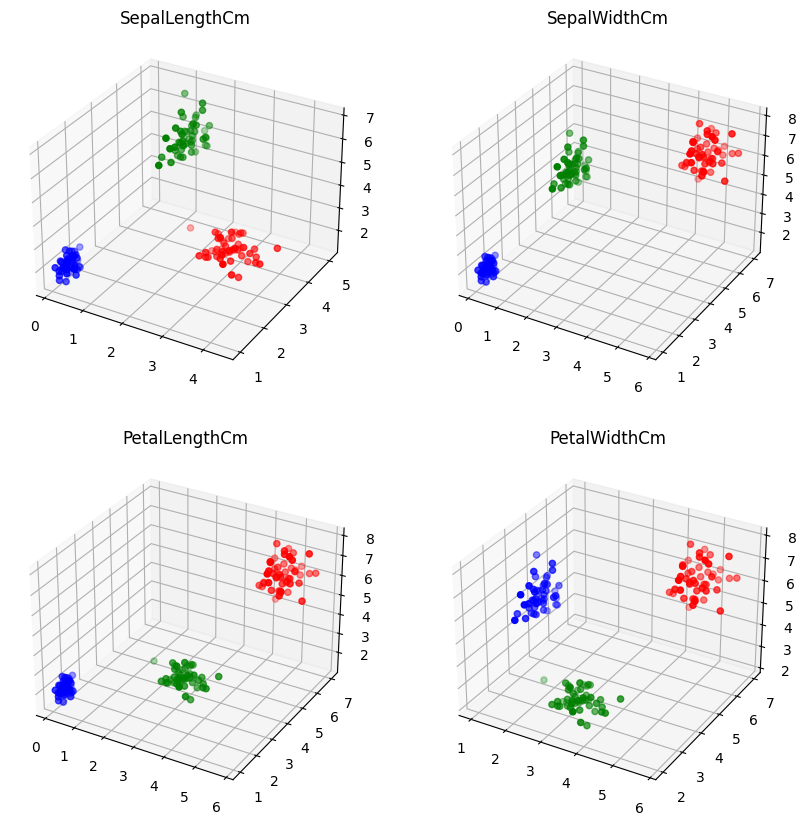

In [20]:
fig = plt.figure(figsize=(10, 10))
c = ['r', 'g', 'b']

for i in range(l):
    tmp = []
    for j in range(l):
        if j != i:
            tmp.append(features[j])
    f1 = fig.add_subplot(l//2, l//2, i+1, projection='3d')
    f1.scatter3D((df[df['Species'] == espece[0]])[tmp[0]], (df[df['Species'] == espece[1]])[tmp[0]], (df[df['Species'] == espece[2]])[tmp[0]], color=c[0])
    f1.scatter3D((df[df['Species'] == espece[0]])[tmp[1]], (df[df['Species'] == espece[1]])[tmp[1]], (df[df['Species'] == espece[2]])[tmp[1]], color=c[1])
    f1.scatter3D((df[df['Species'] == espece[0]])[tmp[2]], (df[df['Species'] == espece[1]])[tmp[2]], (df[df['Species'] == espece[2]])[tmp[2]], color=c[2])
    f1.set_title(features[i])

plt.show()

C:\Users\fredl\AppData\Local\Temp\ipykernel_22388\539850462.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.loc[:, df.columns != 'Id'].corr(), cmap = 'Blues', square = True, annot = True)


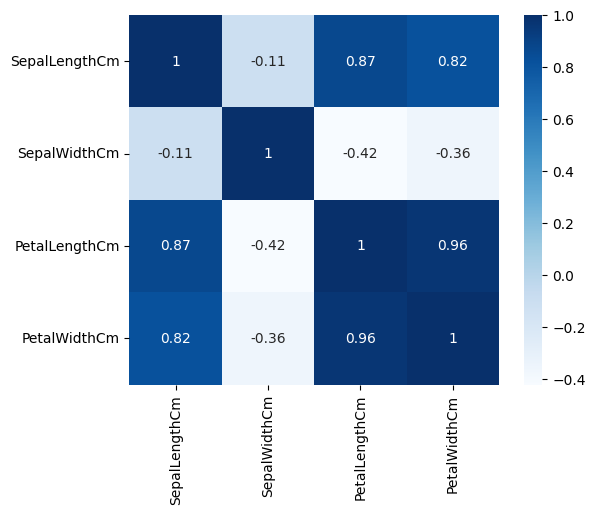

In [21]:
sns.heatmap(df.loc[:, df.columns != 'Id'].corr(), cmap = 'Blues', square = True, annot = True)
plt.show()

In [22]:
df = df.loc[:, df.columns != 'Id']
X = df.drop(['Species'], axis = 1)
y = df['Species']
print(X, y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns] 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [26]:
def results(predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print(cl_rep)
    cm_model = confusion_matrix(y_test, predictions)
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', square = True)
    plt.title(name)
    plt.show()    

Précision:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



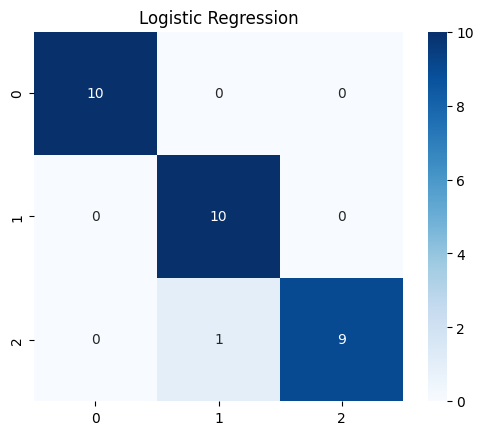

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = lr.score(X_test, y_test)
print("Précision: ", acc)
results(y_pred, 'Logistic Regression')

Précision:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



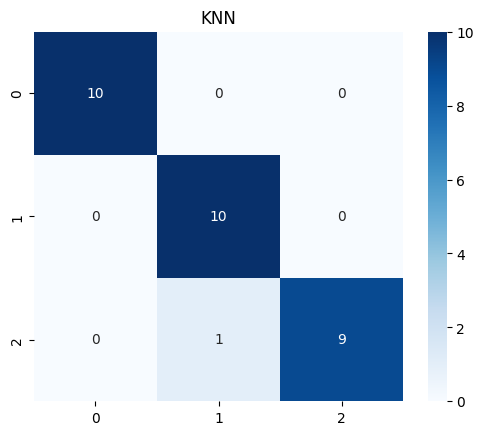

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = knn.score(X_test, y_test)
print("Précision: ", acc)
results(y_pred, 'KNN')

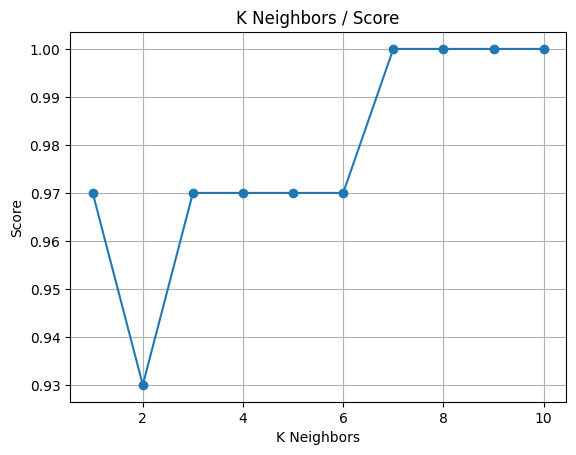

In [29]:
store_acc = []
neighbors = [i for i in range(1, 11)]
for i in range(len(neighbors)):
    knn_i = KNeighborsClassifier(n_neighbors = neighbors[i])
    knn_i.fit(X_train, y_train)
    y_pred = knn_i.predict(X_test)
    acc_knn_for_diff_values = round(knn_i.score(X_test, y_test), 2)
    store_acc.append(acc_knn_for_diff_values)
plt.figure()
plt.plot(neighbors, store_acc, marker = 'o')
plt.title('K Neighbors / Score')
plt.xlabel('K Neighbors')
plt.ylabel('Score')
plt.grid(True)
plt.show()

Précision:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



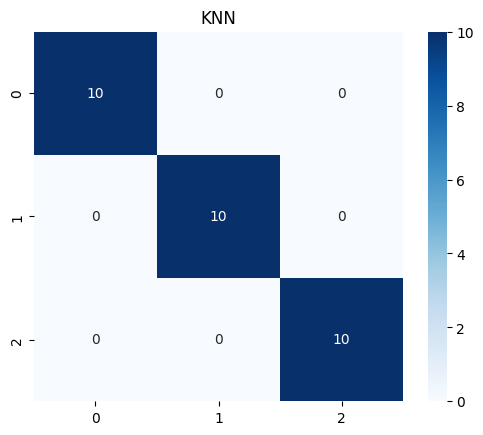

In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = knn.score(X_test, y_test)
print("Précision: ", acc)
results(y_pred, 'KNN')

Précision:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



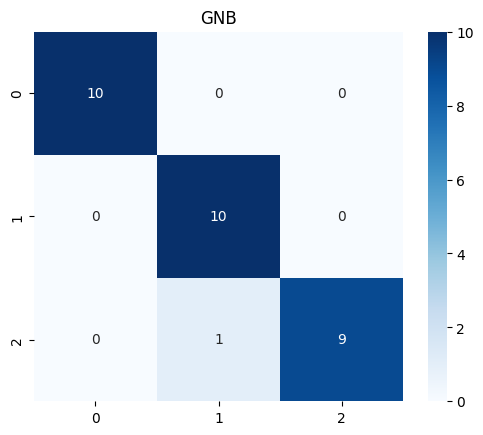

In [31]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = gnb.score(X_test, y_test)
print("Précision: ", acc)
results(y_pred, 'GNB')

Précision:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



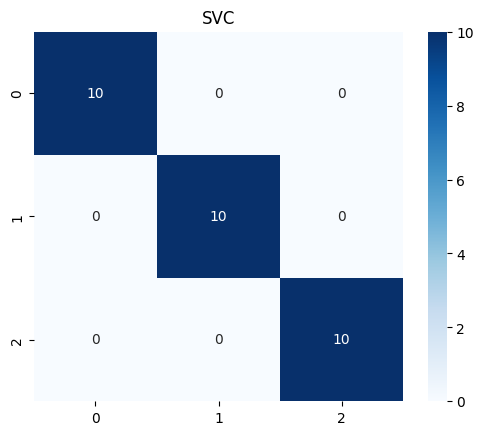

In [32]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = svc.score(X_test, y_test)
print("Précision: ", acc)
results(y_pred, 'SVC')

Précision:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



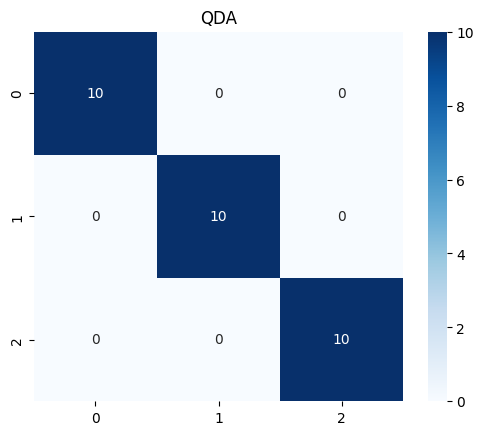

In [33]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
acc = qda.score(X_test, y_test)
print("Précision: ", acc)
results(y_pred, 'QDA')

Précision:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



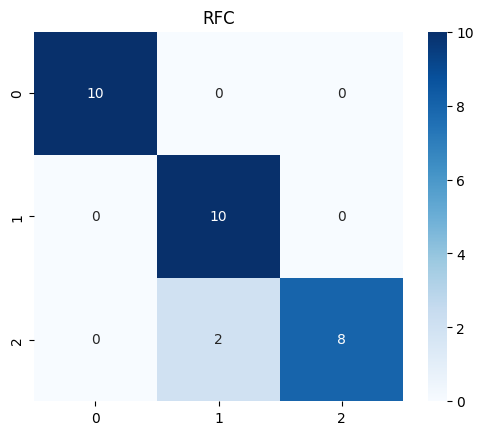

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc = rfc.score(X_test, y_test)
print("Précision: ", acc)
results(y_pred, 'RFC')

Précision:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



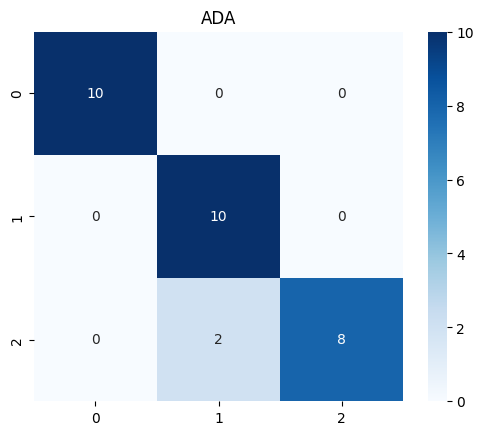

In [35]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
acc = ada.score(X_test, y_test)
print("Précision: ", acc)
results(y_pred, 'ADA')